# GeoPandas example

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)


## Introduction

This notebook reads data from a survey where respondents provide the name and location (latitude and longitude) of their "home town".

If you are following the *Elements of Data Science* curriculum, you can read this notebook after doing the `02_times` notebook.  I'll use some features you have not seen yet, but you can get a preview of where we are headed.

The following cell reads the data into a Pandas DataFrame.

In [1]:
import pandas as pd

# To read data from a Google spreadsheet, open the sheet in Drive,
# Share, then "Get shareable link".  Copy the link and paste it into
# a Jupyter cell, then copy the `sheet_id`, which is a long string
# of letters and numbers in the middle of the URL, and paste it below.

# The following is the sheet ID for the survey of DS10 instructors
sheet_id = '1JcTiP-GxUtnTjTT6U0b7KxgbmsVpGiPkCBu3e7qVdyQ'

# The following is the sheet ID for the survey of DS10 students
#sheet_id = '1Xo144yGrM2TLSPlM9EhS3imGlWdL4YZccALDHYnGAYg'

url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
df = pd.read_csv(url)
df.columns = ['Timestamp', 'Home town', 'latitude', 'longitude']
df

,Timestamp,Home town,latitude,longitude
0,1/13/2020 19:14:30,"Irvine, CA",33.684566,-117.826508
1,1/13/2020 19:44:00,"Pune, India",18.520430,73.856743
2,1/13/2020 20:40:25,Saint Louis,38.627003,-90.199402
3,1/13/2020 20:48:29,"Amman, Jordan",31.958090,35.945808
4,1/13/2020 21:33:30,"Fremont, CA",37.548271,-121.988571
5,1/13/2020 21:37:49,"Los Angeles, CA, USA",34.050000,-118.240000
6,1/13/2020 22:42:26,Shanghai,31.230391,121.473701
7,1/14/2020 9:35:38,Luzern,47.050167,8.309307


## GeoPandas

The following cell installs GeoPandas, which we'll use to visualize the results.

In [2]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install geopandas

Now the following import statements should work.

In [3]:
import geopandas as gpd

The following code loads a map of the world and plots it.

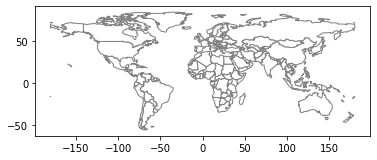

In [4]:
%matplotlib inline

path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world.to_crs(epsg=3395)

world.plot(color='white', edgecolor='gray');

## Making the map

We'll use `Point` and `LineString` to plot locations and lines.

In [5]:
from shapely.geometry import Point, LineString

Here's a point that represents the location of Boston.  Notice that when you create a `Point`, the order of latitude and longitude is non-standard.

In [6]:
lat = 42.3601
lon = -71.0589
boston = Point(lon, lat)

The following cell loops through the rows of the DataFrame and creates two GeoSeries: one contains a `Point` for each location, the other contains a `LineString` for each location.

In [7]:
lines = gpd.GeoSeries()
points = gpd.GeoSeries()
points['boston'] = boston

for i, row in df.iterrows():
    timestamp, name, lat, lon = row
    print(name, lat, lon)
    hometown = Point(lon, lat)
    points[name] = hometown
    lines[name] = LineString([hometown, boston])

Irvine, CA 33.684566 -117.826508
Pune, India 18.520429999999998 73.85674300000001
Saint Louis 38.627003 -90.199402
Amman, Jordan 31.958090000000002 35.945808
Fremont, CA 37.548271 -121.988571
Los Angeles, CA, USA 34.05 -118.24
Shanghai  31.230390999999997 121.473701
Luzern 47.050167 8.309307


Now we can plot the world map, the home towns, and the lines.

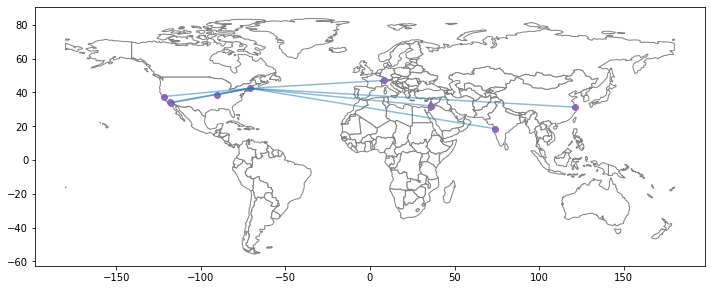

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
ax = plt.gca()

# plot the map
world.plot(color='white', edgecolor='gray', ax=ax)

# plot the lines
lines.plot(color='C0', alpha=0.5, ax=ax)

# plot the points
points.plot(color='C4', ax=ax);